In [1]:
# autoreload modules when files have been altered
%load_ext autoreload
%autoreload 2

#import neccessary dependencies for code
import numpy as np
import pandas as pd
import re
import scipy
from scipy.io import readsav
import dill
from itertools import product
import savReaderWriter
import pickle

import cProfile
import pstats

import sys, os
sys.path.append("../SFscripts/")

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30}
matplotlib.rc('font', **font)

import ComputerOps
import SelectionGrid

IndentationError: unexpected indent (FieldUnions.py, line 343)

In [ ]:
def playSound():
    from pygame import mixer # Load the required library
    import time

    mixer.init()
    mixer.music.load('/home/andy/Documents/EJ-ImStillStanding.mp3')
    mixer.music.play()

    time.sleep(10)

    mixer.music.stop()
    mixer.quit()
    
playSound()

In [5]:
logger = ComputerOps.LogData()
logger.start()
Testing = SelectionGrid.FieldInterpolator("../SFdata/APOGEE/ApogeeFileInformation.pickle",
                                        ColMagSF_exists = False,
                                        surveysf_exists = False)
logger.stop()
logger.display()

Latest Version
{'JKlimu': 'cuBound', 'Hlimu': 'muBound', 'FieldName': 'fieldID', 'RA': 'RA', 'Dec': 'Dec', 'JKliml': 'clBound', 'Hliml': 'mlBound'}
Importing data for Colour-Magnitude Field interpolants...
{'h': 'appC', 'k': 'appB', 'j': 'appA', 'ra': 'RA', '# location_id': 'fieldID', 'dec': 'Dec'}
...done.

Creating Colour-Magnitude Field interpolants...
Current field in col-mag calculation: 2001.0, 1/639

/home/andy/anaconda2/lib/python2.7/site-packages/scipy/optimize/slsqp.py:63: RuntimeWarning: invalid value encountered in subtract
  jac[i] = (func(*((x0+dx,)+args)) - f0)/epsilon
../SFscripts/StatisticalModels.py:323: RuntimeWarning: invalid value encountered in greater
  minBool = Val > minVal
../SFscripts/StatisticalModels.py:324: RuntimeWarning: invalid value encountered in less
  maxBool = Val < maxVal
../SFscripts/StatisticalModels.py:267: RuntimeWarning: divide by zero encountered in log
  contPoints = np.sum( np.log(model) )


Current field in col-mag calculation: 5200.0, 638/639...done
.
Undilling isochrone interpolants...
...done.

Creating Distance Age Metalicity interpolants...
appHmat range of values:(-12.867000000000001, 25.857149978319907)
Current field being interpolated: 5200.0...done.

Unpickling survey selection function...
...done.

Counting intersection area fractions...
4242.0
<type 'numpy.float64'>
...done311
         9824794981 function calls (9822058892 primitive calls) in 15644.828 seconds

   Ordered by: internal time
   List reduced from 1272 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
  6559689 3877.247    0.001 13478.867    0.002 StatisticalModels.py:31(bivariateGauss)
 14837189 1788.449    0.000 2009.954    0.000 necompiler.py:750(evaluate)
1999548682  547.519    0.000  681.756    0.000 {isinstance}
 57738422  486.750    0.000  486.750    0.000 {method 'reduce' of 'numpy.ufunc' objects}
 63263953  480.424    0.000 2671.172    0

In [19]:
N = 40000
# Latitude weighted by cosine angle distribution
brand = np.arcsin(2*np.random.rand(N)-1)
lrand = np.random.rand(N)*2*np.pi
# Generate dataframe for random points across sky
coordsrand = np.vstack((lrand, brand)).T
coordsrand = pd.DataFrame(coordsrand, columns=["l", "b"])

age = 1.
s = 0.1
mh = -0.2

coordsrand['age'] = age
coordsrand['s'] = s
coordsrand['mh'] = mh

In [26]:
_ = Testing(coordsrand)


Note: this is iterating through 10k stars at a time.
        If lots of memory available, increase N for greater efficiency.
0
1
2


In [21]:
len(_)

40000

In [112]:
_[_.union>0]

,index,l,b,age,s,mh,points,field_info,union
index,,,,,,,,,
534,534,0.924919,-0.596204,1.0,0.1,-0.2,[2011.0],"[(0.00115690171229, 2011.0)]",0.001157
1318,1318,0.917048,-0.604277,1.0,0.1,-0.2,[2011.0],"[(0.00115690171229, 2011.0)]",0.001157
4144,4144,0.968776,-0.611629,1.0,0.1,-0.2,[2011.0],"[(0.00115690171229, 2011.0)]",0.001157
5898,5898,0.916313,-0.619438,1.0,0.1,-0.2,[2011.0],"[(0.00115690171229, 2011.0)]",0.001157
7464,7464,0.936717,-0.624688,1.0,0.1,-0.2,[2011.0],"[(0.00115690171229, 2011.0)]",0.001157


In [4]:
logger = ComputerOps.LogData()
logger.start()
Testing = SelectionGrid.FieldInterpolator("../SFdata/RAVE/raveFileInformation.pickle",
                                        ColMagSF_exists = False,
                                        surveysf_exists = False)
logger.stop()
logger.display()

Latest Version
1
Importing data for Colour-Magnitude Field interpolants...
...done.

Creating Colour-Magnitude Field interpolants...
1029m24
integrate with Simpson's
logL: 4931.34, sum log(f(xi)): 4947.84, integral: 16.502425

/home/andy/anaconda2/lib/python2.7/site-packages/scipy/optimize/optimize.py:1850: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


logL: 32924.76, sum log(f(xi)): 37847.52, integral: 4922.76
The error in the linear numerical integral was -5.622E-01%

The cubature calculation error is quoted as 4.981E-05 or 9.978E-07%
integrate with Simpson's
logL: 105.34, sum log(f(xi)): 148.32, integral: 42.98
The error in the linear numerical integral was -1.416E+00%

The cubature calculation error is quoted as 4.356E-07 or 9.994E-07%
...done
.
Undilling isochrone interpolants...
...done.

Creating Distance Age Metalicity interpolants...
appHmat range of values:(-12.867000000000001, 25.857149978319907)
Current field being interpolated: 1029m24...done.

Unpickling survey selection function...
...done.

         49955785 function calls (49893601 primitive calls) in 62.656 seconds

   Ordered by: internal time
   List reduced from 1197 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   202916   10.127    0.000   34.580    0.000 StatisticalModels.py:31(bivariateGauss)
    11332 

In [19]:
logger = ComputerOps.LogData()
logger.start()
Testing2 = SelectionGrid.FieldInterpolator("../SFdata/RAVE/raveFileInformation.pickle",
                                        ColMagSF_exists = True,
                                        surveysf_exists = True)
logger.stop()
logger.display()

Latest Version
1565
Unpickling survey selection function...
...done.

         73705 function calls (73434 primitive calls) in 0.068 seconds

   Ordered by: internal time
   List reduced from 675 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     6474    0.009    0.000    0.018    0.000 arrayprint.py:381(wrapper)
     6474    0.007    0.000    0.007    0.000 arrayprint.py:399(array2string)
        1    0.006    0.006    0.006    0.006 {method 'read' of 'pandas._libs.parsers.TextReader' objects}
        2    0.006    0.003    0.027    0.014 internals.py:4739(_transform_index)
     6474    0.003    0.000    0.021    0.000 numeric.py:1905(array_str)
      103    0.002    0.000    0.002    0.000 {method 'decode' of 'str' objects}
        1    0.002    0.002    0.012    0.012 AngleDisks.py:322(EquatToGal)
      521    0.002    0.000    0.002    0.000 {method 'readline' of 'file' objects}
     3688    0.001    0.000    0.001    0.000 {

In [8]:
Testing.pointings

,fieldID,RA,Dec,mlBound,muBound,clBound,cuBound,SolidAngle,l,b,half_opening
fieldID,,,,,,,,,,,
2000.0,2000.0,4.482058,0.620971,7.0,13.8,0.5,NoLimit,7.0,1.026955,6.227294e-01,1.492705
2001.0,2001.0,4.491832,0.587041,7.0,13.8,0.5,NoLimit,7.0,0.988033,6.083721e-01,1.492705
2003.0,2003.0,4.516964,0.556306,7.0,13.8,0.5,NoLimit,7.0,0.957423,5.810127e-01,1.492705
2005.0,2005.0,4.534749,0.478482,7.0,13.8,0.5,NoLimit,7.0,0.873296,5.458183e-01,1.492705
2007.0,2007.0,5.516515,0.000000,7.0,13.8,0.5,NoLimit,7.0,0.864888,-5.092247e-01,1.492705
2011.0,2011.0,5.636768,0.000192,7.0,13.8,0.5,NoLimit,7.0,0.941622,-6.104261e-01,1.492705
2015.0,2015.0,5.528400,0.177954,7.0,13.8,0.5,NoLimit,7.0,1.037766,-4.200012e-01,1.492705
2034.0,2034.0,4.575154,1.006235,7.0,13.8,0.5,NoLimit,7.0,1.500851,5.868245e-01,1.492705
2037.0,2037.0,4.453190,1.105212,7.0,13.8,0.5,NoLimit,7.0,1.629206,6.350820e-01,1.492705


54.5834929845
787.972235627
12.547080854


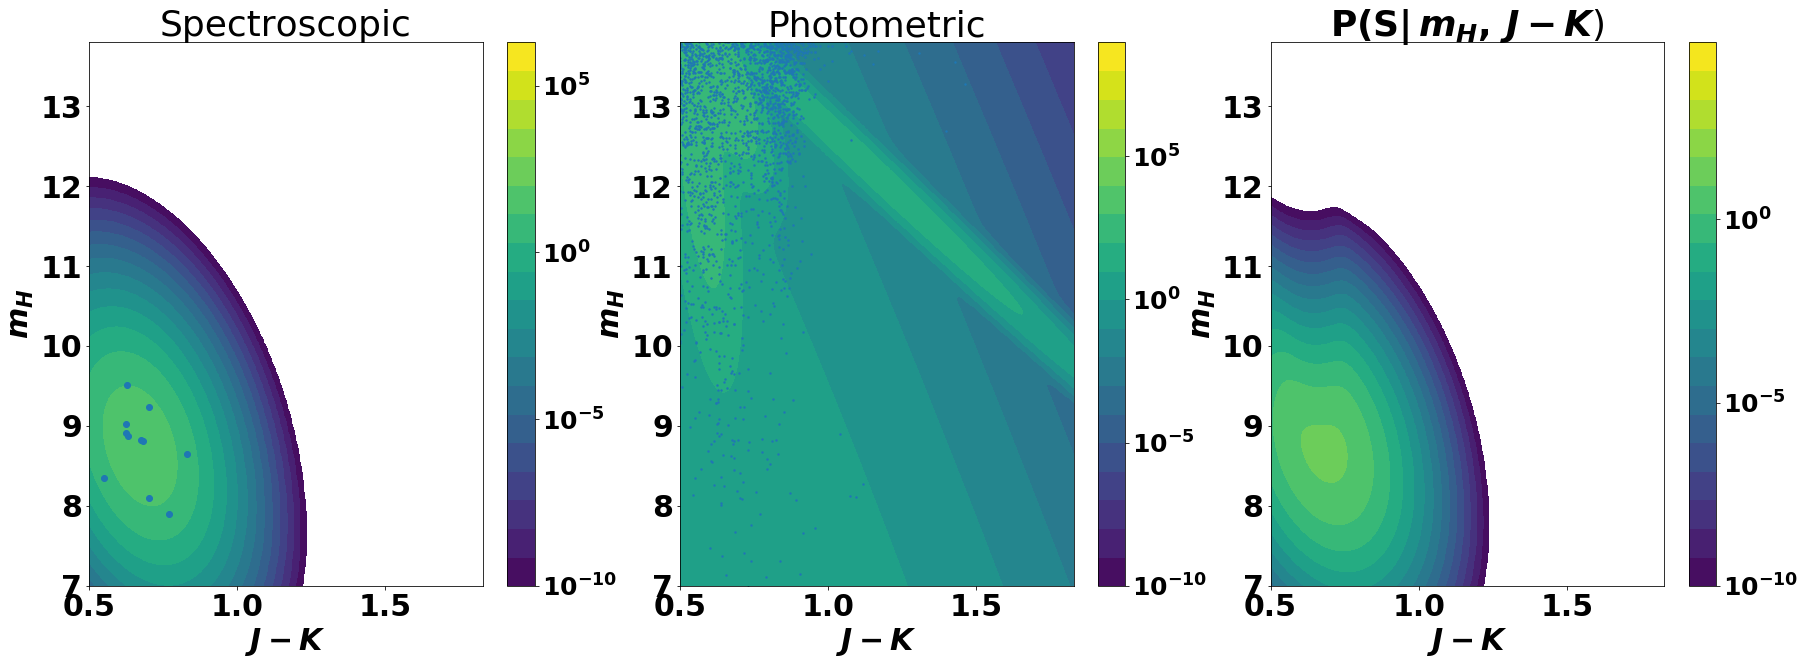

In [12]:
field = 2037.0
#field = '1029m24'

fig = plt.figure(figsize=(30,10))
ax0 = fig.add_subplot(131)
ax1 = fig.add_subplot(132)
ax2 = fig.add_subplot(133)


plt.sca(ax0)
points = Testing.stars[Testing.stars.fieldID == field]
SelectionGrid.plotObsSF(Testing.obsSF[field], realm = 'spectro',
                        scat = True, scatdata = (points.appC, points.Colour),
                        fig_given = True, ax = ax0, fig = fig,
                        title="Spectroscopic")


plt.xlim(Testing.obsSF[field].spectro_colrange)
plt.ylim(Testing.obsSF[field].spectro_magrange)

plt.sca(ax1)
SelectionGrid.plotObsSF(Testing.obsSF[field], realm = 'photo',
                        fig_given = True, ax = ax1, fig = fig,
                        title = "Photometric")

photopoints = True
if photopoints:
    photo_points = pd.read_csv(Testing.photo_path+str(field)+Testing.photo_tag)
    coords = ['Jmag', 'Hmag', 'Kmag']
    photo_points=photo_points.rename(index=str, 
                                    columns=dict(zip(Testing.photo_coords[2:5], coords)))
    photo_points['Colour'] = photo_points.Jmag - photo_points.Kmag

    plt.scatter(photo_points.Colour, photo_points.Hmag, s=2.)

plt.xlim(Testing.obsSF[field].spectro_colrange)
plt.ylim(Testing.obsSF[field].spectro_magrange)
    
plt.sca(ax2)
SelectionGrid.plotObsSF(Testing.obsSF[field], realm = 'SF',
                        fig_given = True, ax = ax2, fig = fig,
                        title = "$\mathrm{P}(\mathrm{S}|\,m_{H},\,J-K$)")




#print(Testing.obsSF[field].spectro_interp.params_f)
#print(Testing.obsSF[field].photo_interp.params_f)


#fig.savefig("../../SFgithub/Presentation/images/Apogee_triplot_0802.png", bbox_inches="tight")
#fig.savefig("../../SFgithub/Presentation/images/RAVE_triplot_0802.png", bbox_inches="tight")

60.8110160751
nan


(7.0, 13.800000000000001)

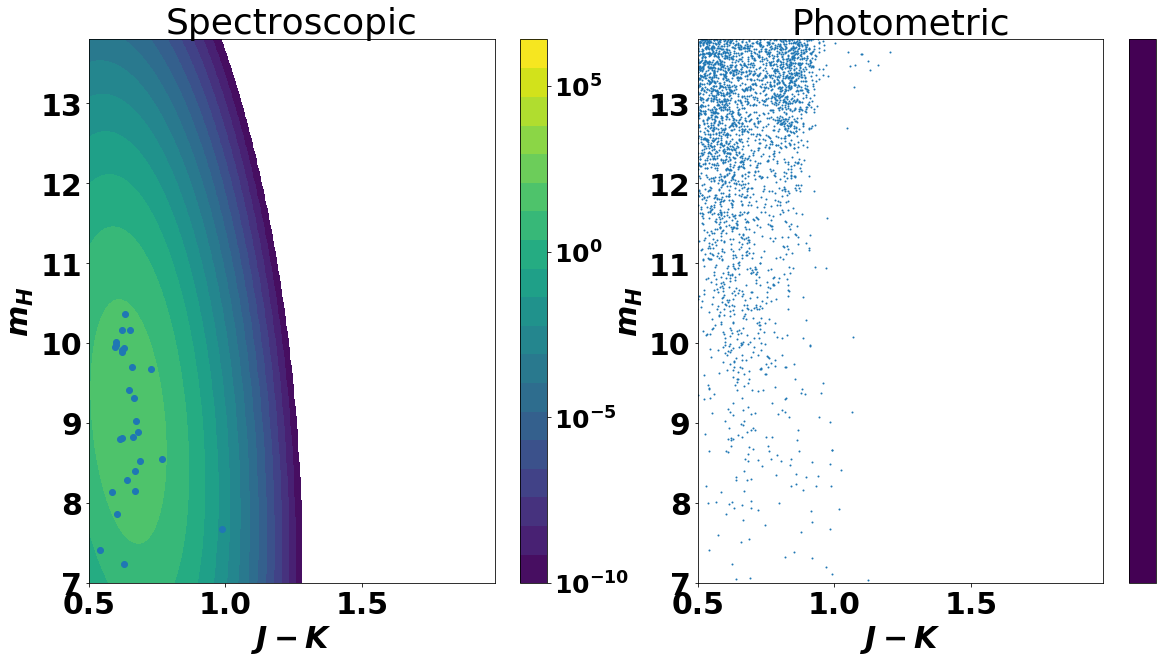

In [10]:
fig = plt.figure(figsize=(20,10))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)


plt.sca(ax0)
points = Testing.stars[Testing.stars.fieldID == field]
SelectionGrid.plotObsSF(Testing.obsSF[field], realm = 'spectro',
                        scat = True, scatdata = (points.appC, points.Colour),
                        fig_given = True, ax = ax0, fig = fig,
                        title="Spectroscopic")


plt.xlim(Testing.obsSF[field].spectro_colrange)
plt.ylim(Testing.obsSF[field].spectro_magrange)

plt.sca(ax1)
SelectionGrid.plotObsSF(Testing.obsSF[field], realm = 'photo',
                        fig_given = True, ax = ax1, fig = fig,
                        title = "Photometric")

photopoints = True
if photopoints:
    photo_points = pd.read_csv(Testing.photo_path+str(field)+Testing.photo_tag)
    coords = ['Jmag', 'Hmag', 'Kmag']
    photo_points=photo_points.rename(index=str, 
                                    columns=dict(zip(Testing.photo_coords[2:5], coords)))
    photo_points['Colour'] = photo_points.Jmag - photo_points.Kmag

    plt.scatter(photo_points.Colour, photo_points.Hmag, s=1.)

plt.xlim(Testing.obsSF[field].spectro_colrange)
plt.ylim(Testing.obsSF[field].spectro_magrange)

#fig.savefig("../../SFgithub/Presentation/images/Apogee_biplot_0802.png", bbox_inches="tight")
#fig.savefig("../../SFgithub/Presentation/images/RAVE_biplot_0802.png", bbox_inches="tight")

129.698691934
8150.26496895


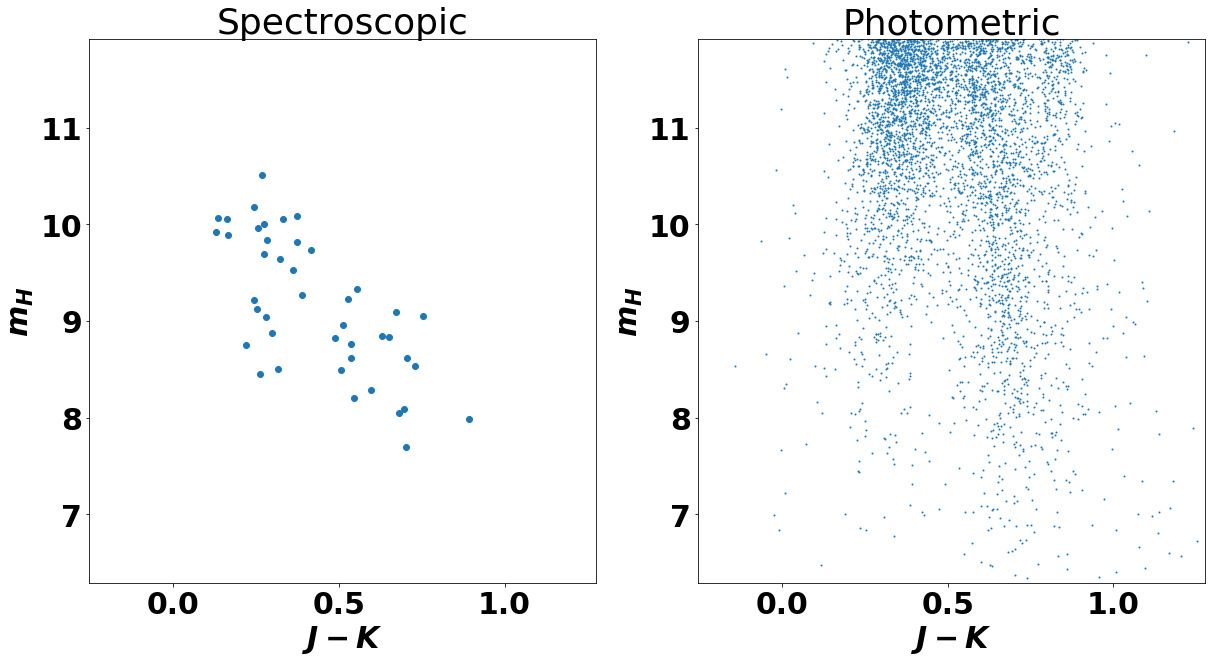

In [16]:
#field = 2005.0
field = '1029m24'

fig = plt.figure(figsize=(20,10))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)


plt.sca(ax0)
points = Testing.stars[Testing.stars.fieldID == field]
SelectionGrid.plotObsSF(Testing.obsSF[field], realm = 'spectro',
                        scat = True, scatdata = (points.appC, points.Colour),
                        fig_given = True, ax = ax0, fig = fig,
                        title="Spectroscopic", view_contours=False)


plt.xlim(Testing.obsSF[field].spectro_colrange)
plt.ylim(Testing.obsSF[field].spectro_magrange)

plt.sca(ax1)
SelectionGrid.plotObsSF(Testing.obsSF[field], realm = 'photo',
                        fig_given = True, ax = ax1, fig = fig,
                        title = "Photometric", view_contours = False)

photopoints = True
if photopoints:
    photo_points = pd.read_csv(Testing.photo_path+str(field)+Testing.photo_tag)
    coords = ['Jmag', 'Hmag', 'Kmag']
    photo_points=photo_points.rename(index=str, 
                                    columns=dict(zip(Testing.photo_coords[2:5], coords)))
    photo_points['Colour'] = photo_points.Jmag - photo_points.Kmag

    plt.scatter(photo_points.Colour, photo_points.Hmag, s=1.)

plt.xlim(Testing.obsSF[field].spectro_colrange)
plt.ylim(Testing.obsSF[field].spectro_magrange)

#fig.savefig("../../SFgithub/Presentation/images/Apogee_biscatter_0802.png", bbox_inches="tight")
fig.savefig("../../SFgithub/Presentation/images/RAVE_biscatter_0802.png", bbox_inches="tight")

12.547080854


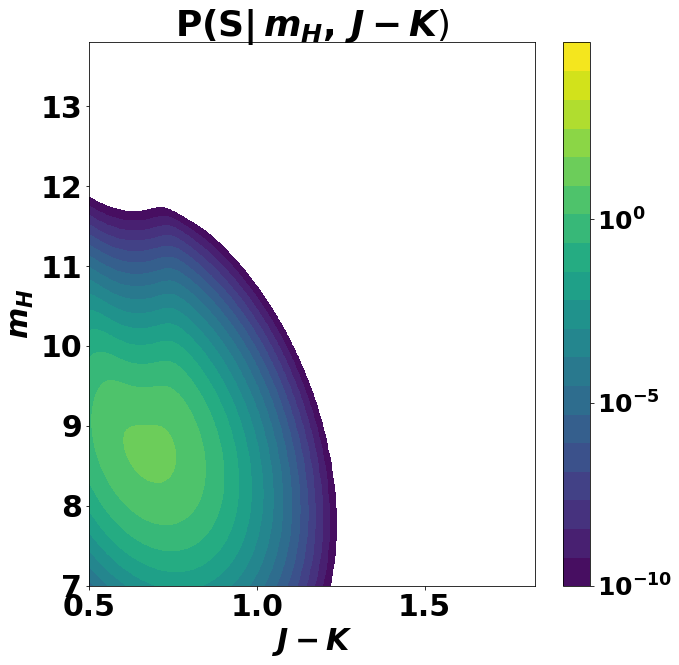

In [13]:
fig = plt.figure(figsize=(10, 10))
ax0 = fig.add_subplot(111)
SelectionGrid.plotObsSF(Testing.obsSF[field], realm = 'SF',
                        fig_given = True, ax = ax0, fig = fig,
                        title = "$\mathrm{P}(\mathrm{S}|\,m_{H},\,J-K$)")

#fig.savefig("../../SFgithub/Presentation/images/Apogee_SF_0802.png", bbox_inches="tight")
#fig.savefig("../../SFgithub/Presentation/images/RAVE_SF_0802.png", bbox_inches="tight")

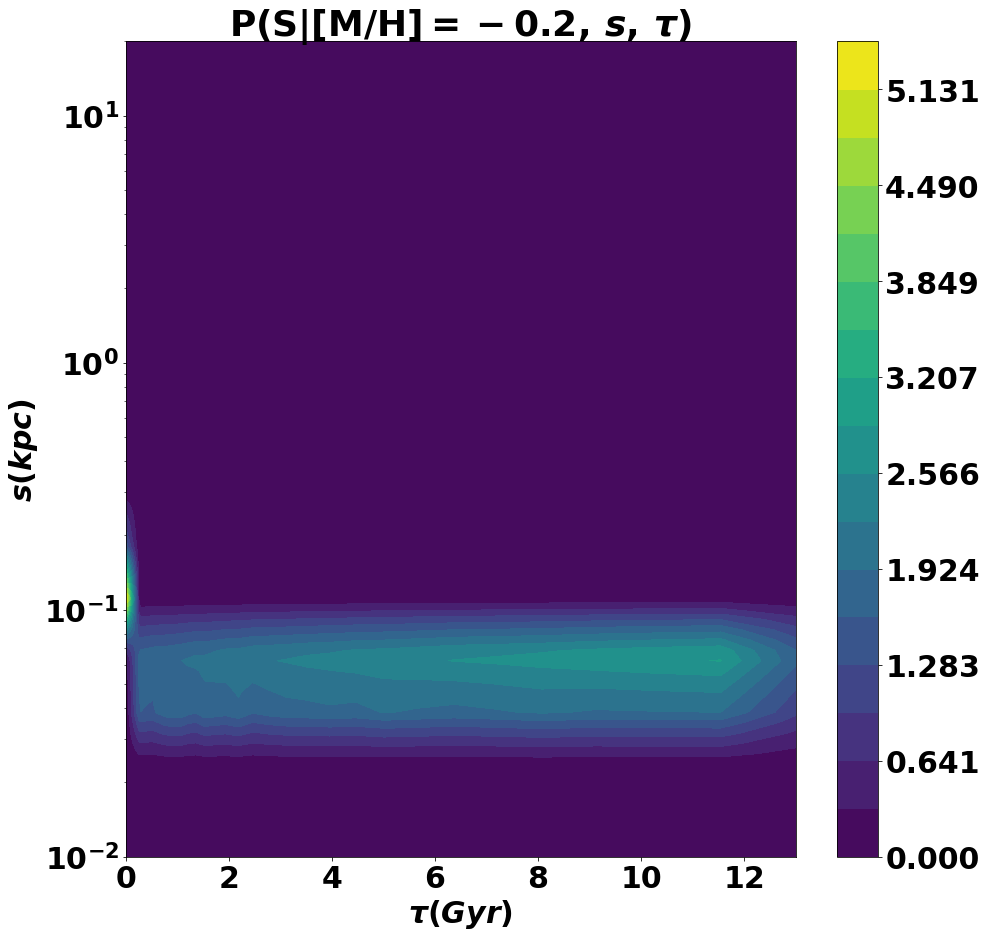

In [14]:
SelectionGrid.plotSpectroscopicSF(Testing.surveysf, field, nlevels=18,
                                  #save=True, fname="../../SFgithub/Presentation/images/RAVE_SpecSF_0802",
                                  title=r"$\mathrm{P}(\mathrm{S}|\mathrm{[M/H] = -0.2},\, s,\, \tau)$")

In [25]:
lats = Testing2.pointings.b

print(np.max(lats), np.min(lats))

(1.2851217572564191, -1.5705779606512855)


In [26]:
Testing.pointings

,fieldID,RA,Dec,SolidAngle,l,b,half_opening
fieldID,,,,,,,
1029m24,1029m24,2.748385,-0.419184,28.3,4.641258,0.497404,3.001361


In [68]:
coords = (9., 0.3)

print(Testing.obsSF[field].spectro_interp(coords))
print(Testing.obsSF[field].photo_interp(coords))
print(Testing.obsSF[field](coords))

0.00727520002873
21.209676168
0.000343013253531


../../SFProject/WriteUp/PaperFigs/RAVE_specSF.png


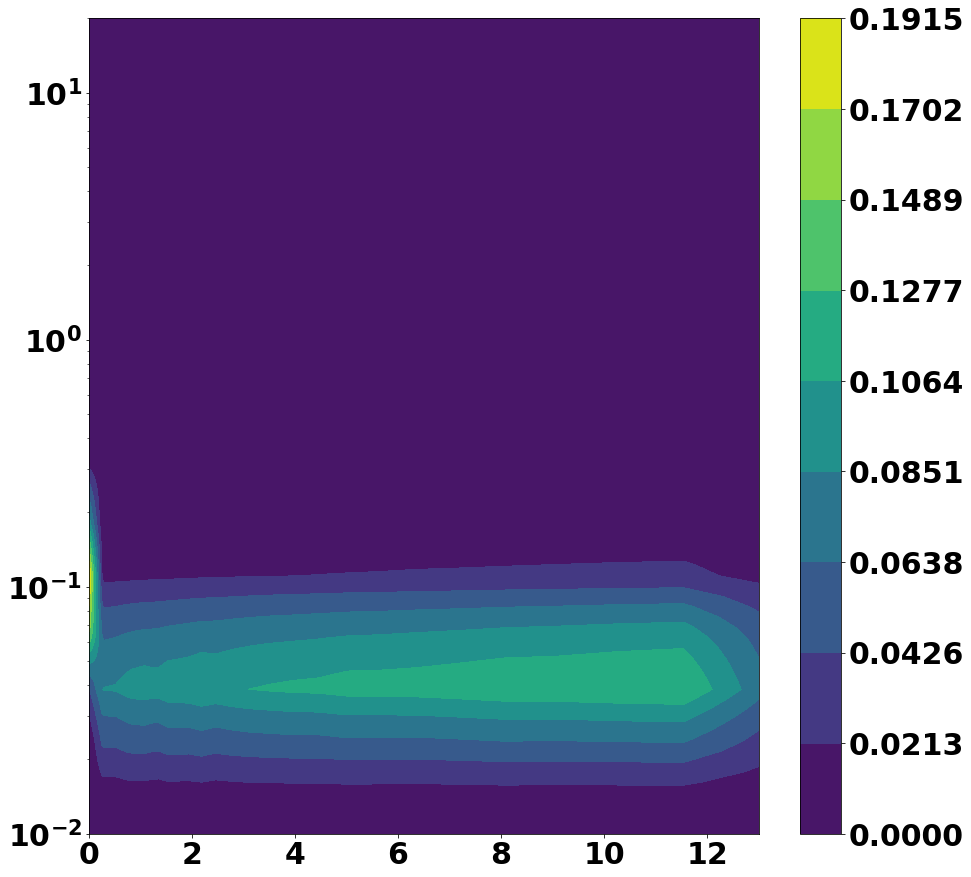

In [5]:
SelectionGrid.plotSpectroscopicSF(Testing.surveysf, field, 
                                  save=True, fname="../../SFProject/WriteUp/PaperFigs/RAVE_specSF.png")

# Isochrone image

In [37]:
print("Undilling isochrones and interpolants...")
with open('../../SFProject/Data/Isochrones/isochrone_distributions_resampled.pickle', "rb") as input:
    pi = pickle.load(input)
print("...done.")
print(" ")

Undilling isochrones and interpolants...
...done.
 


In [38]:
isoage = pi['isoage']
isomh = pi['isomh']
isodict = pi['isodict']

In [ ]:
isodict?


In [ ]:
fig1  = plt.figure(figsize=(10,10)) 



for jage in range(0,nage,nskip):
    for jmh in range(0,nmh,nskip):
        interpname  = "age"+str(pi.isoage[jage])+"mh"+str(pi.isomh[jmh])   
        isochrone   = pi.isodict[interpname]
        logte_iso   = isochrone[:,5]
        absmagH_iso = isochrone[:,14]
        plt.plot(logte_iso,absmagH_iso)